# Telecom Customer Churn Prediction

### Context

"Predict behavior to retain customers. Analyzing all relevant customer data and develop focused customer retention programs".


> ***Source - IBM Sample Data Sets***


### Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

- **Customers who left within the last month –*** the column is called Churn


- **Services that each customer has signed up for –*** phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.


- **Customer account information –** how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.


- **Demographic info about customers –** gender, age range, and if they have partners and dependents


Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="telecom-customer-churn-prediction")

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Updating notebook "donatusprince/telecom-customer-churn-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/donatusprince/telecom-customer-churn-prediction


'https://jovian.ai/donatusprince/telecom-customer-churn-prediction'

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV #Hyper parameter Tunning
from sklearn.model_selection import RandomizedSearchCV #Perform a Randomizd Grid Search

In [5]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
jovian.commit(file = 'Telco-Customer-Churn.csv')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/telecom-customer-churn-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/donatusprince/telecom-customer-churn-prediction


'https://jovian.ai/donatusprince/telecom-customer-churn-prediction'

In [7]:
#sneak peak into the data to see the kind of data available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
# converting the Total Charges column from objecty datatype to numeric
df['TotalCharges']= pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
churn_df = df.copy()

### What is the number and percentage of all Telecom Customers Contracts?

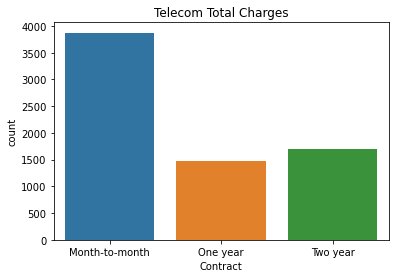

In [11]:
sns.countplot(x='Contract', data=churn_df).set(title='Telecom Total Charges');

In [12]:
churn_df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

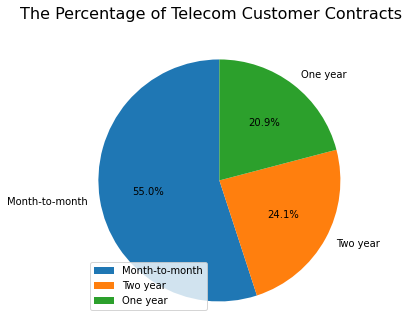

In [13]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('The Percentage of Telecom Customer Contracts ', fontsize=16)

plt.pie(churn_df.Contract.value_counts(), labels=churn_df.Contract.value_counts().index, autopct="%.1f%%", startangle=90);
plt.axis('square')
plt.legend(loc='lower left');

### Observation:

- The total telecom customer is 7043. 3875 which is 55% of customers are under the month to month contract. 1695 which is 24.1% of the customers are under a two years contract while 1473 customers which is 20.9% of the telecom customers have a one year contract.

In [14]:
churn_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [15]:
churn_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


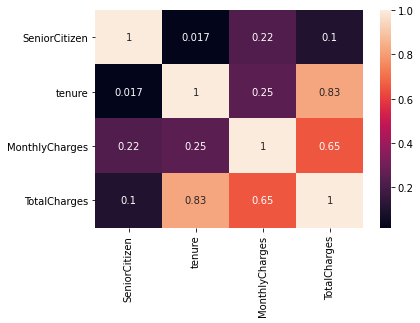

In [16]:
sns.heatmap(churn_df.corr(), annot=True);

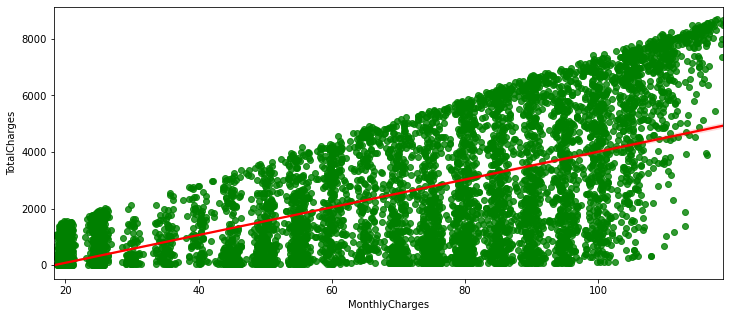

In [17]:
fig = plt.figure(figsize=[12, 5])

sns.regplot(data = churn_df, x = 'MonthlyCharges', y = 'TotalCharges', scatter_kws={"color": "green"}, line_kws={"color": "red"});

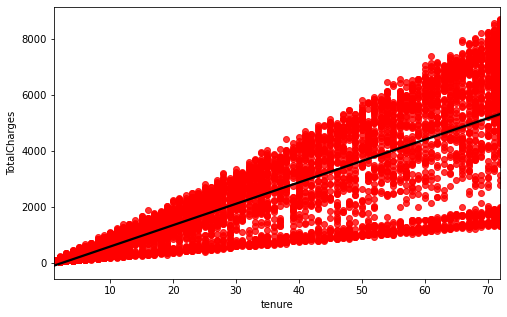

In [18]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(data = churn_df, x = 'tenure', y = 'TotalCharges', scatter_kws={"color": "red"}, line_kws={"color": "black"});

### Observation:

- From the analysis, it is obeserved that the Monthly charges have a positive correlation with the Total Charges.


- It also observed that tenure has a very strong positive correlation with Total Charges.

### *Plotting the payment method of the telecom customers*

<Figure size 864x360 with 0 Axes>

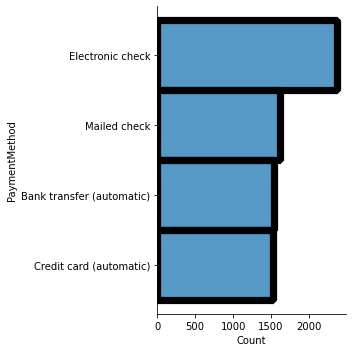

In [19]:
plt.figure(figsize=(12,5))
sns.displot(y='PaymentMethod', data=churn_df);

### *Plotting the Payment Method and The Total Charges using a BoxPlot*

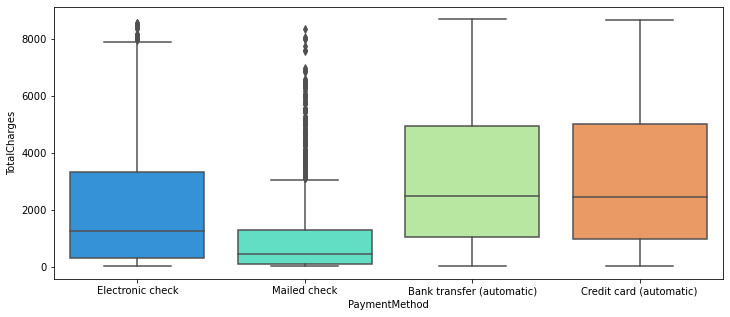

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x='PaymentMethod',y='TotalCharges',data=churn_df, palette='rainbow');

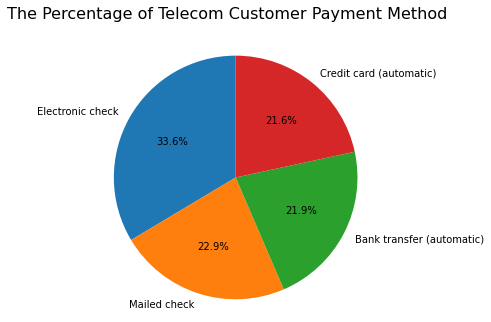

In [21]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('The Percentage of Telecom Customer Payment Method ', fontsize=16)

plt.pie(churn_df.PaymentMethod.value_counts(), labels=churn_df.PaymentMethod.value_counts().index, autopct="%.1f%%", startangle=90);
plt.axis('square');
#plt.legend(loc='lower left')

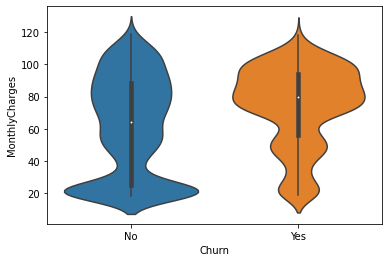

In [22]:
#Plotting Monthly Charges with the Churn decision of the customer
sns.violinplot(x="Churn", y="MonthlyCharges", data=churn_df,size=8);

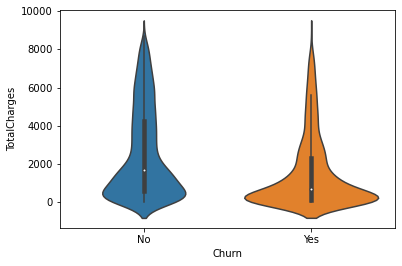

In [23]:
#Plotting Total Charges with the Churn decision of the customer
sns.violinplot(x="Churn", y="TotalCharges", data=churn_df,size=8);

In [24]:
# Execute this to save new versions of the notebook
jovian.commit(project="telecom-customer-churn-prediction")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "donatusprince/telecom-customer-churn-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/donatusprince/telecom-customer-churn-prediction


'https://jovian.ai/donatusprince/telecom-customer-churn-prediction'

In [25]:
ml_df = churn_df.copy()

In [26]:
ml_df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
2957,2674-MIAHT,Female,0,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,80.30,324.20,No
3264,6818-DJXAA,Female,0,No,Yes,10,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,91.10,964.35,No
6853,9079-YEXQJ,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes
3259,9620-ENEJV,Female,0,No,No,6,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),70.55,433.95,No


In [27]:
# Converting the Churn column from categorical variable to binary

#churn_df['Churn'].replace(['No', 'Yes'], [0,1], inplace = True) 

In [28]:
# binarize our categorical labels for Churn
ml_df['Churn_id'] = ml_df['Churn'].factorize()[0]

# setting up the assosicated dictionary for later usage with heat maps and confusion matrix
ml_id_df = ml_df[['Churn', 'Churn_id']].drop_duplicates().sort_values('Churn_id')

### *Converting the categorical columns into their factor values using One Hot Encoding*

In [29]:
new_df = ml_df.drop(['customerID', 'Churn'], axis=1)

In [30]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_id
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [31]:
X_new = list(new_df.columns[new_df.dtypes == 'object'])
print("categorical Columns:", X_new)

categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [32]:
X = pd.get_dummies(new_df[X_new], drop_first=True)
y = new_df['Churn_id']

In [33]:
# decision tree classifier without prunning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
clf.score(X, y)

0.905154053670311

In [34]:
# decision tree classifier with prunning
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)
clf.fit(X, y)
clf.score(X, y)

0.7346301292063041

### *Creating test and train data for the Logistic Regression model to make predictions*

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
log_pred = model.predict(X_test)

### *Using the predicted values(pred) and our actual values (y_test), we can create a confusion matrix with the confusion_matrix function.*

> Then, using the ravel( ) method of our confusion_matrix function, we can get the True Positive, True Negative, False Positive, and False Negative values

In [39]:
log_accuracy = confusion_matrix(y_test, log_pred)
print('The Accuracy of the Logistic Regression Model: \n', log_accuracy)

The Accuracy of the Logistic Regression Model: 
 [[1359  183]
 [ 287  284]]


In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, log_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 1359
False Positive: 183
False Negative: 287
True Positive: 284


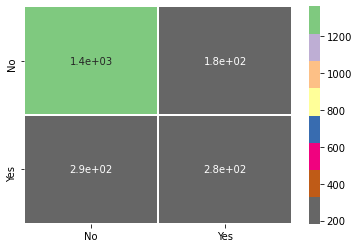

In [41]:
#plotting the confusion matrix for easy visualization using heatmap

sns.heatmap(log_accuracy, cmap='Accent_r', annot=True, linewidths=0.5,
           xticklabels=ml_id_df['Churn'].values,
           yticklabels=ml_id_df['Churn'].values);

In [42]:
# Getting the accuracy score of our predition

score = accuracy_score(y_test, log_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.7775674396592522


In [43]:
matrix = classification_report(y_test, log_pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1542
           1       0.61      0.50      0.55       571

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



### *Creating test and train data for Random Forest Classifier model to make predictions*

In [44]:
rfc_model = RandomForestClassifier()

In [45]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rfc_pred = rfc_model.predict(X_test)

In [47]:
rfc_accuracy = confusion_matrix(y_test, rfc_pred)
print('The Accuracy of the Random Forest Classifier Model: \n', rfc_accuracy)

The Accuracy of the Random Forest Classifier Model: 
 [[1346  196]
 [ 332  239]]


In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 1346
False Positive: 196
False Negative: 332
True Positive: 239


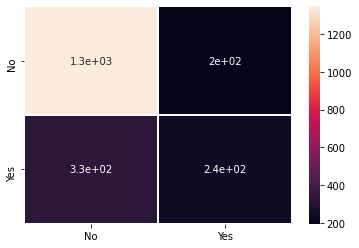

In [49]:
#plotting the confusion matrix for easy visualization using heatmap

sns.heatmap(rfc_accuracy, annot=True, linewidths=0.5,
           xticklabels=ml_id_df['Churn'].values,
           yticklabels=ml_id_df['Churn'].values);

In [50]:
# Getting the accuracy score of our predition

score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.7501183151916706


In [51]:
matrix = classification_report(y_test, rfc_pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      1542
           1       0.55      0.42      0.48       571

    accuracy                           0.75      2113
   macro avg       0.68      0.65      0.66      2113
weighted avg       0.73      0.75      0.74      2113



### *Creating test and train data for Random Forest Classifier model to make predictions*

In [52]:
# decision tree classifier without prunning (default parameter)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.914604462474645

In [53]:
dtc_pred = dtc.predict(X_test)
dtc.score(X_test, y_test)

0.7221959299574066

In [54]:
dtc_accuracy = confusion_matrix(y_test, dtc_pred)
print('The Accuracy of the Decision Tree Classifier Model: \n', dtc_accuracy)

The Accuracy of the Decision Tree Classifier Model: 
 [[1267  275]
 [ 312  259]]


In [55]:
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 1267
False Positive: 275
False Negative: 312
True Positive: 259


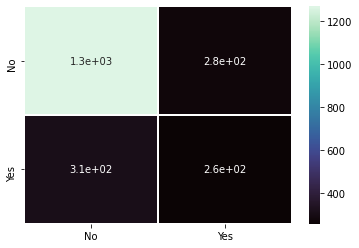

In [56]:
#plotting the confusion matrix for easy visualization using heatmap

sns.heatmap(dtc_accuracy, annot=True, cmap='mako', linewidths=0.5,
           xticklabels=ml_id_df['Churn'].values,
           yticklabels=ml_id_df['Churn'].values);

In [57]:
# Getting the accuracy score of our predition

score = accuracy_score(y_test, dtc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.7221959299574066


In [58]:
matrix = classification_report(y_test, dtc_pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1542
           1       0.49      0.45      0.47       571

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [59]:
#plotting decision tree
from sklearn import tree

In [60]:
#tree.plot_tree(dtc)

In [61]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |  

In [62]:
#Checking which variance are of importance
for name, importance in zip(X_train.columns, dtc.feature_importances_):
    print(name, importance)

gender_Male 0.07418512989594274
Partner_Yes 0.044171081402275165
Dependents_Yes 0.06096720440223181
PhoneService_Yes 0.005583569862715143
MultipleLines_No phone service 0.008602305048098523
MultipleLines_Yes 0.06969691396884939
InternetService_Fiber optic 0.13329944786677952
InternetService_No 1.89380741967341e-05
OnlineSecurity_No internet service 0.0
OnlineSecurity_Yes 0.0300365880185412
OnlineBackup_No internet service 0.0
OnlineBackup_Yes 0.05536324113212768
DeviceProtection_No internet service 0.008543258091768792
DeviceProtection_Yes 0.05877878310604246
TechSupport_No internet service 0.0
TechSupport_Yes 0.04856483079051025
StreamingTV_No internet service 0.0
StreamingTV_Yes 0.05006724588986439
StreamingMovies_No internet service 0.0002643044980081903
StreamingMovies_Yes 0.06030837848102169
Contract_One year 0.07831321463327465
Contract_Two year 0.09316218383401306
PaperlessBilling_Yes 0.04544200382662552
PaymentMethod_Credit card (automatic) 0.0256469696797955
PaymentMethod_Elec

### *Random Grid Search with Gradient Boosting*

In [63]:
#Gradient Boosting Machine
# Hyperparameter tuning: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

#How fast the algorithm learns
learning_rate = [0.001, .01, .05]
# Number of trees in the forest
n_estimators = [200, 1000, 2000]
# Maximum number of levels in tree
max_depth = np.linspace(1, 21, 21, endpoint=True)
# Minimum number of samples required to split a node
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)
# Minimum number of samples required at each leaf node
min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True)
# Method of selecting samples for training each tree
max_features = list(range(1,X_train.shape[1]))

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}

### *Use the Random Grid to search for best Hyperparameters*

In [64]:
# First create the base model to tune
gbm = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random.fit(X_train, y_train)

#Best parameters
gbm_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.1min finished


{'n_estimators': 2000,
 'min_samples_split': 0.30000000000000004,
 'min_samples_leaf': 0.1,
 'max_features': 14,
 'max_depth': 12.0,
 'learning_rate': 0.01}

### *Doing Grid Search based on the results After Random Search*

In [65]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate': [.001,.005],
    'max_depth': [2, 4],
    'max_features': [1,2],
    'min_samples_leaf': [.2,.3],
    'min_samples_split': [.2,.3],
    'n_estimators': [200,300]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbm, param_grid = param_grid, 
                          cv = 5, verbose = 2)
#Training with the Grid Search
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=3

[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=3

[CV]  learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=2

[CV]  learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=2

[CV]  learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=200 
[CV]  learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=200, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300, total=   0.5s
[CV] learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300, total=   0.6s
[CV] learning_rate=0.001, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=3

[CV]  learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=2

[CV]  learning_rate=0.005, max_depth=2, max_features=1, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300, total=   0.3s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=200, total=   0.3s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.2, min_samples_split=0.2, n_estimators=2

[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.2s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=200, total=   0.3s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=2, max_features=2, min_samples_leaf=0.3, min_samples_split=0.3, n_estimators=3

[CV]  learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.3s
[CV] learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.3s
[CV] learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.3s
[CV] learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=300, total=   0.3s
[CV] learning_rate=0.005, max_depth=4, max_features=1, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=3

[CV]  learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300 
[CV]  learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.2, min_samples_split=0.3, n_estimators=300, total=   0.4s
[CV] learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.2s
[CV] learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200 
[CV]  learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=200, total=   0.2s
[CV] learning_rate=0.005, max_depth=4, max_features=2, min_samples_leaf=0.3, min_samples_split=0.2, n_estimators=2

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  1.9min finished


{'learning_rate': 0.001, 'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 0.2, 'min_samples_split': 0.2, 'n_estimators': 200}


In [66]:
#Predictions for the GBM
gbm = GradientBoostingClassifier(learning_rate = .001, max_depth= 2,max_features= 1, min_samples_leaf= .3,min_samples_split= .2, n_estimators= 300, random_state = 42)
gbm.fit(X_train, y_train)
scores = cross_val_score(gbm, X_train, y_train, cv=5)
np.mean(scores)
print('the average validation accuracy across our 5 folds is ' + str(np.mean(scores)))

the average validation accuracy across our 5 folds is 0.7367139959432049


### *Grid Search with Random Forest*

In [67]:
# Number of trees in random forest
n_estimators = [400, 1000]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [1, 7, 12]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
#Training with the Grid Search
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.5min finished


{'bootstrap': True, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000}


In [69]:
#Creating a Bagging Classifier without hyperparameter tuning
bag = BaggingClassifier(n_estimators = 600, max_samples = 0.5, max_features = 0.5, random_state = 42)
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_train, y_train, cv=5)
np.mean(scores)
print('the average validation accuracy across our 5 folds for Bagging is ' + str(np.mean(scores)))

the average validation accuracy across our 5 folds for Bagging is 0.7821501014198784


In [98]:
#Predictions for the Random Forest
#rf = RandomForestClassifier(bootstrap = True, max_depth= 1, max_features= 'sqrt' , min_samples_leaf= 2, min_samples_split= 2, n_estimators= 400)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train, y_train, cv=5)
np.mean(scores)
print('the average validation accuracy across our 5 folds for Random Forest is ' + str(np.mean(scores)))

the average validation accuracy across our 5 folds for Random Forest is 0.761866125760649


In [99]:
#Creating predictions for the Random Forest
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)

0.7557974443918599

In [100]:
rf_accuracy = confusion_matrix(y_test, y_pred)
rf_accuracy

array([[1344,  198],
       [ 318,  253]])

In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 1344
False Positive: 198
False Negative: 318
True Positive: 253


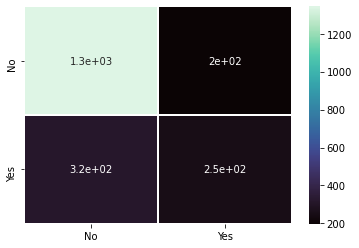

In [102]:
#plotting the confusion matrix for easy visualization using heatmap

sns.heatmap(rf_accuracy, annot=True, cmap='mako', linewidths=0.5,
           xticklabels=ml_id_df['Churn'].values,
           yticklabels=ml_id_df['Churn'].values);

In [103]:
# Getting the accuracy score of our predition

score = accuracy_score(y_test, y_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.7557974443918599


In [104]:
matrix = classification_report(y_test, y_pred)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1542
           1       0.56      0.44      0.50       571

    accuracy                           0.76      2113
   macro avg       0.68      0.66      0.67      2113
weighted avg       0.74      0.76      0.75      2113



In [117]:
#Viewing the predictions
predictions = rf.predict(X)

In [118]:
#Adding the predictions to the dataframe
new_df['predictions'] = predictions
cols_to_keep = ['Churn_id','predictions']
new_df[cols_to_keep].sample(5)

,Churn_id,predictions
6022,0,0
741,0,0
6693,0,1
3848,0,0
6914,1,1


In [119]:
#Hand coding the accuracy of the model predictions.
accuracy = (len(new_df) - (abs(np.sum(new_df['predictions']) - np.sum(new_df['Churn_id']))))/len(new_df)
print('With this simple model we could say we have correctly predicted \n' + str(accuracy) + ' percent of Teleco Customer Churn.')




With this simple model we could say we have correctly predicted 
0.9816839415022007 percent of Teleco Customer Churn.
